In [1]:
# Necessary imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.compat.python import lrange
import patsy
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
%matplotlib inline

In [18]:
df = pd.read_pickle('data/clean_products_df.pkl')

In [3]:
price = df.price; rating = df.rating; num_ratings = df.num_ratings; watcher = df.watcher; shipping = df.shipping
free_return = df.free_return; open_box = df.open_box; pre_owned = df.pre_owned; refurbished = df.refurbished
benefits_charity = df.benefits_charity; last_one = df.last_one; sold = df.sold

In [4]:
# Assign features and target
df = df.iloc[:,3:]
X = df[['price', 'rating', 'num_ratings', 'watcher', 'shipping', 'free_return', 'open_box', 'pre_owned', 'refurbished', 'benefits_charity', 'last_one']]
y = df.sold

#### price

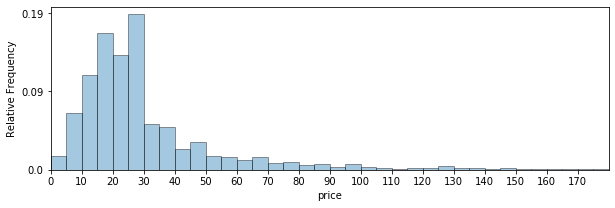

In [5]:
plt.figure(figsize = (10,3))
g = sns.distplot(df.price, kde = False, bins = range(0, 185, 5), hist_kws=dict(edgecolor="k"))
plt.xlim(0, df.price.quantile(.99))
plt.xticks(range(0, 180, 10))

g.set_yticks(range(0, 1100, 500))
g.set_yticklabels([round(x/df.price.count(),2) for x in list(range(0, 1100, 500))])
g.set_ylabel('Relative Frequency');

Price is right-skewed. Most price is between 10 and 40 dollars.

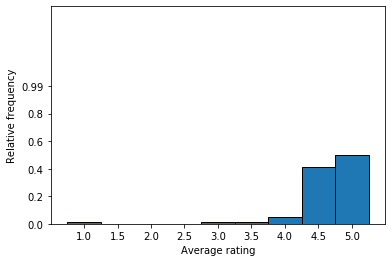

In [6]:
plt.hist(df.rating, align='left',edgecolor='k', bins = np.linspace(0.5, 5.5, 11))
plt.xticks(np.linspace(1,5.5,10)[:-1])
plt.xlim(.5,5.5)
range_y = range(0, df.rating.count(), df.rating.count()//5)
plt.yticks(range_y, labels = [round(x/df.rating.count(),2) for x in range_y])
plt.ylim(0,600)
plt.xlabel('Average rating')
plt.ylabel('Relative frequency');

Rating is heavily left-skewed. Most are either 4.5 or 5.0

In [7]:
np.sum(pd.isna(df),axis=0)

price                  8
rating              4895
num_ratings            0
watcher                0
shipping               4
free_return            0
open_box               4
pre_owned              4
refurbished            4
benefits_charity       0
last_one               0
sold                   0
early_sold             0
later_sold             0
dtype: int64

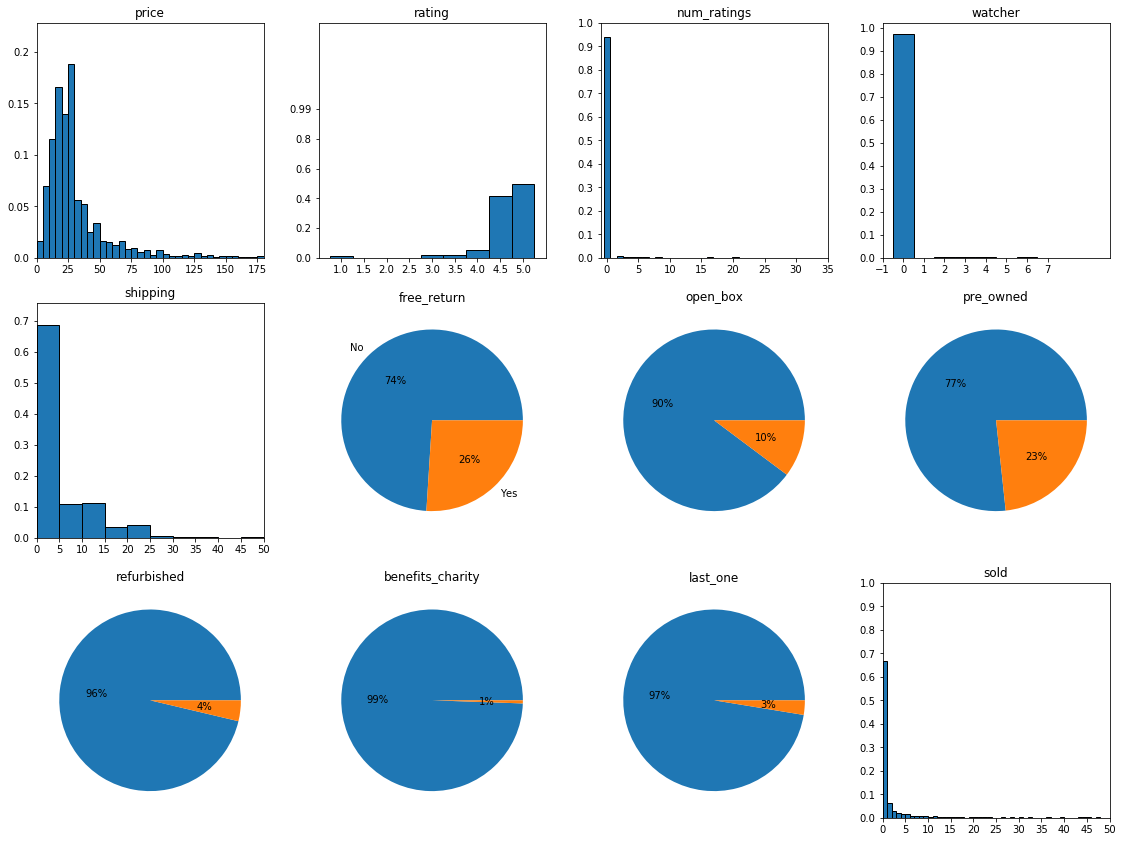

In [8]:
fig, ax = plt.subplots(3,4, figsize=(16,12)); fig.tight_layout(pad=2.4)
a = ax[0,0]
a.hist(df.price, edgecolor="k", bins = range(0, 185, 5))
a.set_xlim(0, df.price.quantile(.99))
a.set_xticks(range(0, 180, 25))
a.set_xticklabels(range(0, 180, 25))
range_y = range(0, df.price.count(), df.price.count()//20)
a.set_yticks(range_y)
a.set_yticklabels([round(y/df.price.count(),2) for y in range_y])
a.set_ylim(0, 1200)
a.set_title('price')

a = ax[0,1]
a.hist(df.rating, align='left',edgecolor='k', bins = np.linspace(0.5, 5.5, 11))
a.set_xticks(np.linspace(1,5.5,10)[:-1])
a.set_xlim(.5,5.5)
range_y = range(0, df.rating.count(), df.rating.count()//5)
a.set_yticks(range_y)
a.set_yticklabels([round(y/df.rating.count(),2) for y in range_y])
a.set_ylim(0,600)
a.set_title('rating')

a = ax[0,2]
a.hist(df.num_ratings, edgecolor='k', bins = np.linspace(-0.5, 50.5, 51))
a.set_xticks(np.linspace(0, 50, 11))
a.set_xlim(-1,35)
range_y = range(0, df.num_ratings.count(), df.num_ratings.count()//10)
a.set_yticks(range_y)
a.set_yticklabels([round(y/df.num_ratings.count(),2) for y in range_y])
a.set_title('num_ratings')

a = ax[0,3]
a.hist(df.watcher, edgecolor='k',bins = np.linspace(-1,7,9), align = 'left')
range_y = range(0, df.watcher.count(), df.watcher.count()//10)
a.set_xlim(0, df.watcher.quantile(.99))
a.set_xticks(np.linspace(-1, 7, 9))
a.set_yticks(range_y)
a.set_yticklabels([round(y/df.watcher.count(),2) for y in range_y])
a.set_title('watcher');

a = ax[1,0]
a.hist(df.shipping, edgecolor = 'k', bins = np.linspace(0, 50, 11))
a.set_xticks(np.linspace(0, 50, 11))
a.set_xlim(0, 50)
range_y = range(0, df.shipping.count(), df.shipping.count()//10)
a.set_yticks(range_y)
a.set_yticklabels([round(y/df.shipping.count(),2) for y in range_y])
a.set_ylim(0, 4000)
a.set_title('shipping');

def draw_pie(axis, input, title, labels=['No', 'Yes']):
    a = ax[axis]
    a.pie(input, labels = labels, autopct = '%1.0f%%')
    a.set_title(title)
    
draw_pie((1,1), [sum(df.free_return == 0), sum(df.free_return == 1)], 'free_return')
draw_pie((1,2), [sum(df.open_box == 0), sum(df.open_box == 1)], 'open_box', None)
draw_pie((1,3), [sum(df.pre_owned == 0), sum(df.pre_owned == 1)], 'pre_owned', None)
draw_pie((2,0), [sum(df.refurbished == 0), sum(df.refurbished == 1)], 'refurbished', None)
draw_pie((2,1), [sum(df.benefits_charity == 0), sum(df.benefits_charity == 1)], 'benefits_charity', None)
draw_pie((2,2), [sum(df.last_one == 0), sum(df.last_one == 1)], 'last_one', None)

a = ax[2,3]
a.hist(df.sold, edgecolor = 'k', bins = np.linspace(0, 1000, 1001))
a.set_xticks(np.linspace(0, 1000, 201))
a.set_xlim(0, 50)
range_y = range(0, df.sold.count(), df.sold.count()//10)
a.set_yticks(range_y)
a.set_yticklabels([round(y/df.sold.count(),2) for y in range_y])
a.set_title('sold');

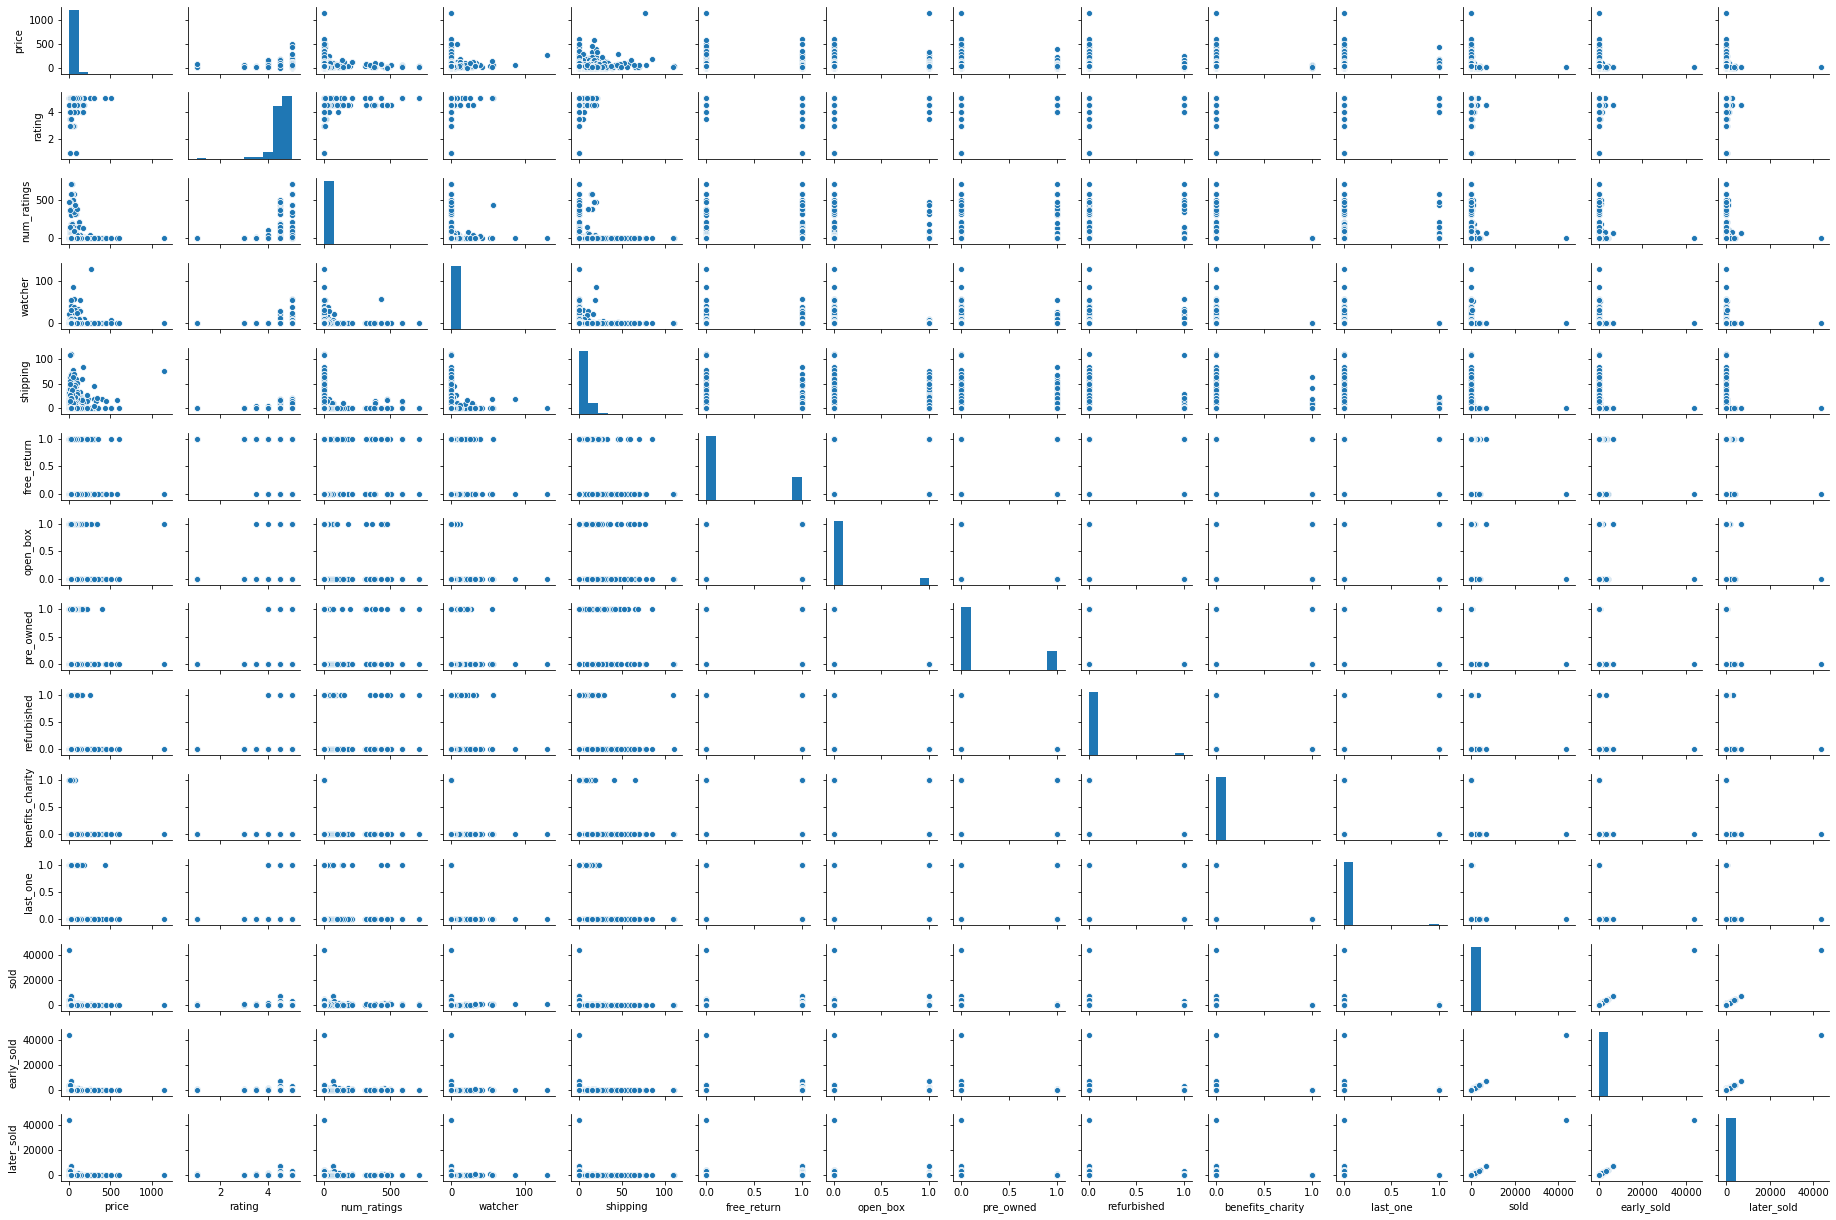

In [9]:
sns.pairplot(df, height=1.2, aspect=1.5);

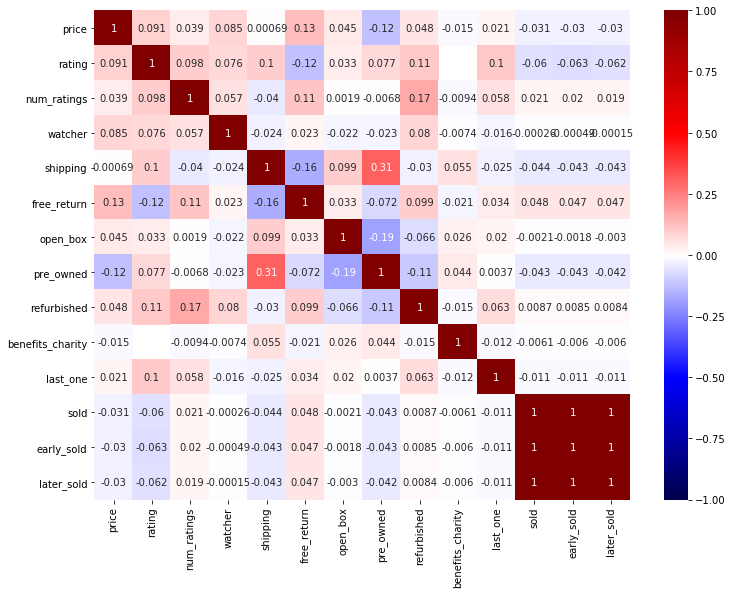

In [10]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [19]:
len(df)

5277